# Data Set Exploration

In [52]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# `news.csv` Data Set

There are 4 columns: 

- article id
- article title
- article text
- lable
 
How many rows? What does the data look like?

In [53]:
#Read the data
df=pd.read_csv('data/news.csv')

#Get shape and head
shape = df.shape
print(f"shape of the dataset: {shape} \n")

df.head(10)

shape of the dataset: (6335, 4) 



,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


# Homework

### Explore the data

Create histograms to show the distributions of the different count columns. Also show histograms for the counts separated by fake and real news. Add markdown cells to the notebook with your observations about the distributions. Are there any differences between fake and real? What about word count vs character count?

If you find something in the data that seems interesting that you want to explore add that to the notebook along with your observations.

Calculate the min and max character and word counts for title and text columns.

Calculate the total number of distinct words across all articles. Note the difference between the max words in the text and the total number of unique words in the dataset.

### TFIDF - Term Frequency Inverse Document Frequency

Here is a good page that describes TFIDF and how to calculate it: http://www.tfidf.com/

Calculate the TFIDF scores for the following words: smell, the, this, washington, money, road, and

How are their scores different from each other? What does this mean?

Extra credit if you have time: what word in the articles has the highest and lowest TFIDF score?

### Stop Words

Here is a page that describes what are known as "stop words":
https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html

Based on this, do you expect stop words to have high or low TFIDF scores?

# Explore the character and word count distributions 

In [54]:
df['text_len'] = df['text'].str.len()
df['text_cnt'] = df['text'].str.count(' ') + 1
df.sort_values('text_len', ascending=True).head(10)

,Unnamed: 0,title,text,label,text_len,text_cnt
1851,5752,America’s Senator Jeff Sessions Warns of Worse...,,FAKE,1,2
6064,6127,"Radio Derb: Peak White Guilt, PC Now To The LE...",,FAKE,1,2
5581,6800,Automation: Robots from Korea to America Are R...,,FAKE,1,2
6175,7043,Hillary’s High Crimes & Misdemeanors Threaten ...,,FAKE,1,2
5088,8875,Huma Abedin’s Muslim Dad,,FAKE,1,2
1941,7525,Putins Army is coming for World war 3 against ...,,FAKE,1,2
4142,6311,Radio Derb transcript for October 29th is up: ...,,FAKE,1,2
2426,5776,Radio Derb Transcript For October 21 Up: The M...,,FAKE,1,2
2832,6733,The Comey Confrontation: In Our New Third-Worl...,,FAKE,1,2
3511,8240,Democrats Playing Class Card To Split the Whit...,,FAKE,1,2


In [55]:
max_text_len = max(df.text_len)
min_text_len = min(df.text_len)
max_freq_text_len = df.text_len.value_counts().max()
min_freq_text_len = df.text_len.value_counts().min()
cnt_distinct_text_len = df.text_len.nunique()

print("""
    max(text_len): {0}
    min(text_len): {1} 
    max(freq_text_len): {2}
    min(freq_text_len): {3}
    count(distinct freq_text_len): {4}
""".format(max_text_len, min_text_len, max_freq_text_len, min_freq_text_len, cnt_distinct_text_len))


    max(text_len): 115372
    min(text_len): 1 
    max(freq_text_len): 59
    min(freq_text_len): 1
    count(distinct freq_text_len): 4562



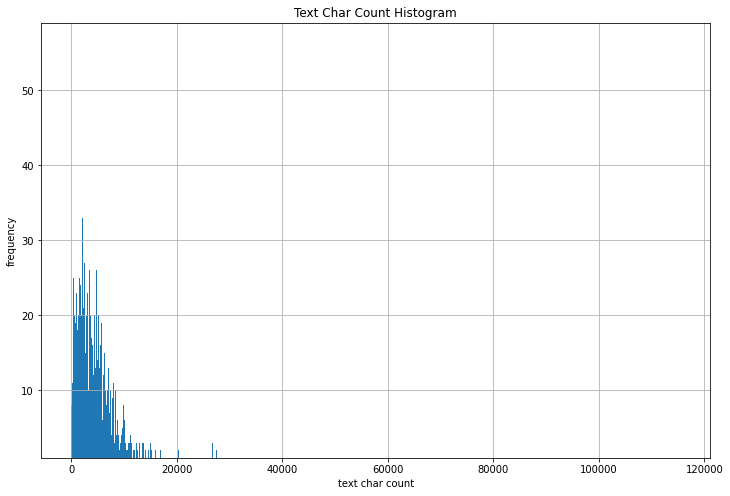

In [56]:
bins = cnt_distinct_text_len
plt.figure(figsize=(12, 8))
plt.hist(df.text_len, bins=bins)
plt.ylim(min_freq_text_len, max_freq_text_len)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

## Histogram Bin Sizes

The distinct count of text lengths is kind of arbitrary and can hide some distribution details depending on how unique the values are or not. 

I like to either use the max value of the x-axis as my bin size when the max value is less than a couple hundred. This way each individual count gets it's own bucket. But if the x-axis is quite large, like this example, I'll play around with a much smaller value, like 100. If 100 seems too course grained, play around with the bin size to get a good level of detail

## Observations

Looks like there are some outliers in this data. To better understand the distribution of data we're dealing with maybe we could remove the outliers and replot the data



In [57]:
df[['title', 'text_len']].groupby(['text_len']).agg(['count']).sort_values('text_len', ascending=True).head(5)

,title
,count
text_len,
1,36
12,1
13,1
17,1
34,1


A 1 character article doesn't make much sense, so lets filter those out

In [58]:
filtered_df = df[df['text_len'] > 1]

print(f'before: {df.shape}. after filtering: {filtered_df.shape}')

before: (6335, 6). after filtering: (6299, 6)


What about really long arcitles? Like those greater than 20,000 words

In [59]:
long_articles_df = df[df['text_len'] > 20000]
print(f'after removing 1 word articles: {long_articles_df.shape}')

after removing 1 word articles: (106, 6)


Only 106 articles are super long, so lets filter those out and see what the distribution looks like now

In [60]:
filtered_df = filtered_df[filtered_df['text_len'] <= 20000]
print(f'after removing articles > 20,000 word: {filtered_df.shape}')

after removing articles > 20,000 word: (6193, 6)


Lets replot the data and see what it looks like

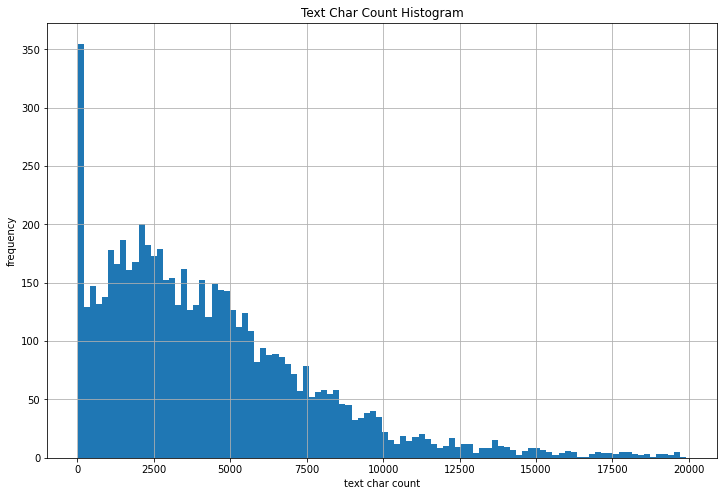

In [80]:
bins = 100
plt.figure(figsize=(12, 8))
plt.hist(filtered_df.text_len, bins=bins)
# plt.ylim(0, max_freq_text_len)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

This give us a better view at the distribution of article char counts over the corpus of all articles

Observations:
- there is a large block of articles with relativly short char counts (the first bin)
- if you remove those short char count articles, the distribution looks fairly normail, but right skewed distribution 

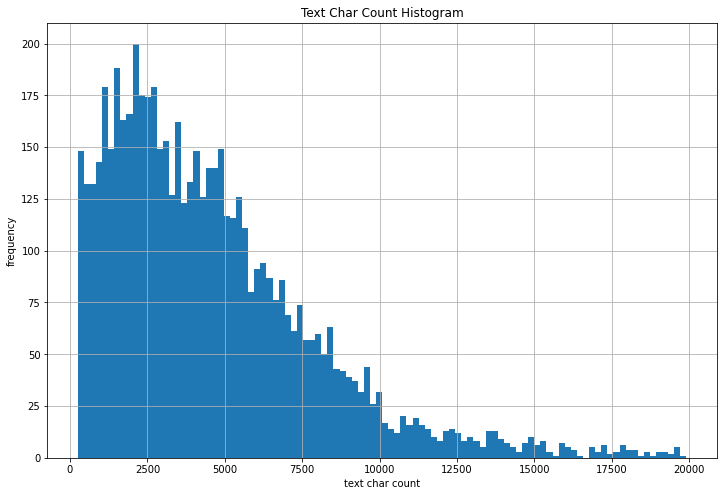

In [91]:
tmp_df = filtered_df[filtered_df['text_len'] > 250]

bins = 100
plt.figure(figsize=(12, 8))
plt.hist(tmp_df.text_len, bins=bins)
# plt.ylim(0, max_freq_text_len)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

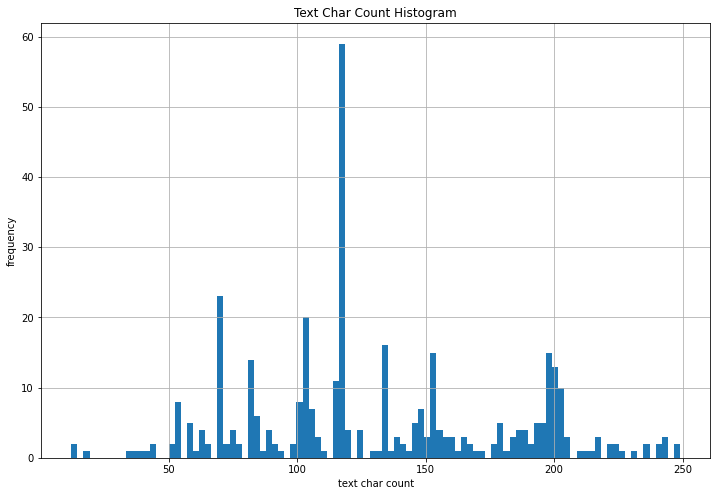

In [92]:
tmp_df = filtered_df[filtered_df['text_len'] <= 250]

bins = 100
plt.figure(figsize=(12, 8))
plt.hist(tmp_df.text_len, bins=bins)
# plt.ylim(0, max_freq_text_len)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

## Why does this even matter?

The plot where we filtered out really large articles and 1 char articles looked like there might be two different types of articles. Do we need two different solutions? One for longer in depth articles and one for short articles?

# Fake Vs. Real

In [103]:
filter = df['label'] == 'REAL'
df_real = df[filter]
df_real

,Unnamed: 0,title,text,label,text_len,text_cnt
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543,423
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840,307
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,783,123
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,13863,2288
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,4296,692
...,...,...,...,...,...,...
6324,2316,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,REAL,1822,283
6327,3262,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL,2212,362
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,4076,629
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,6991,1093


In [104]:
filter = df['label'] == 'FAKE'
df_fake = df[filter]
df_fake

,Unnamed: 0,title,text,label,text_len,text_cnt
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518,1298
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646,446
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660,404
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,13333,2348
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,3171,553
...,...,...,...,...,...,...
6326,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE,3077,489
6328,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE,1,2
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE,2572,412
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,14323,2183


# Character count

In [105]:
max_text_len = max(df_real.text_len)
min_text_len = min(df_real.text_len)
max_freq_text_len = df_real.text_len.value_counts().max()
min_freq_text_len = df_real.text_len.value_counts().min()
cnt_distinct_text_len = df_real.text_len.nunique()

print("""
    max(text_len): {0}
    min(text_len): {1} 
    max(freq_text_len): {2}
    min(freq_text_len): {3}
    count(distinct freq_text_len): {4}
""".format(max_text_len, min_text_len, max_freq_text_len, min_freq_text_len, cnt_distinct_text_len))


    max(text_len): 44039
    min(text_len): 43 
    max(freq_text_len): 58
    min(freq_text_len): 1
    count(distinct freq_text_len): 2610



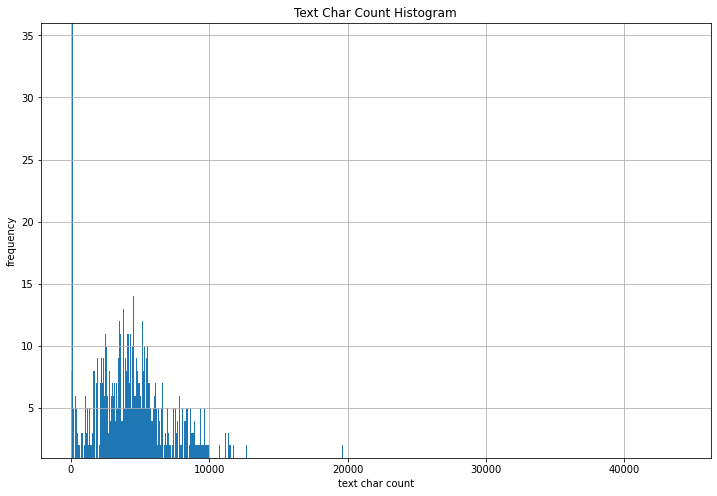

In [109]:
bins = cnt_distinct_text_len
plt.figure(figsize=(12, 8))
plt.hist(df_real.text_len, bins=bins)
plt.ylim(min_freq_text_len, max_freq_text_len)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

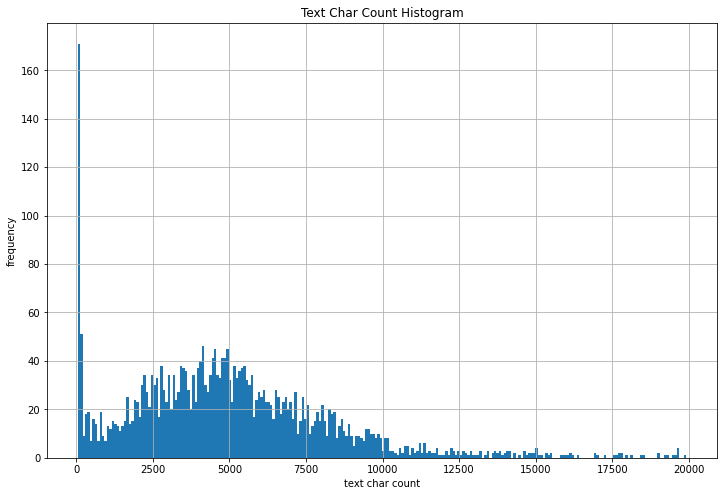

In [113]:
tmp_df = df_real[df_real['text_len'] < 20000]

bins = 250
plt.figure(figsize=(12, 8))
plt.hist(tmp_df.text_len, bins=bins)
# plt.ylim(min_freq_text_len, max_freq_text_len)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

In [114]:
max_text_len = max(df_fake.text_len)
min_text_len = min(df_fake.text_len)
max_freq_text_len = df_fake.text_len.value_counts().max()
min_freq_text_len = df_fake.text_len.value_counts().min()
cnt_distinct_text_len = df_fake.text_len.nunique()

print("""
    max(text_len): {0}
    min(text_len): {1} 
    max(freq_text_len): {2}
    min(freq_text_len): {3}
    count(distinct freq_text_len): {4}
""".format(max_text_len, min_text_len, max_freq_text_len, min_freq_text_len, cnt_distinct_text_len))


    max(text_len): 115372
    min(text_len): 1 
    max(freq_text_len): 36
    min(freq_text_len): 1
    count(distinct freq_text_len): 2525



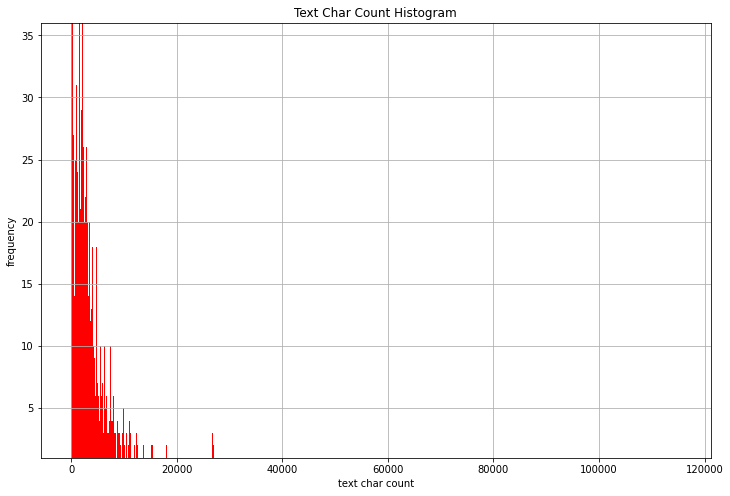

In [119]:
bins = cnt_distinct_text_len
plt.figure(figsize=(12, 8))
plt.hist(df_fake.text_len, bins=bins, color="red")
plt.ylim(min_freq_text_len, max_freq_text_len)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

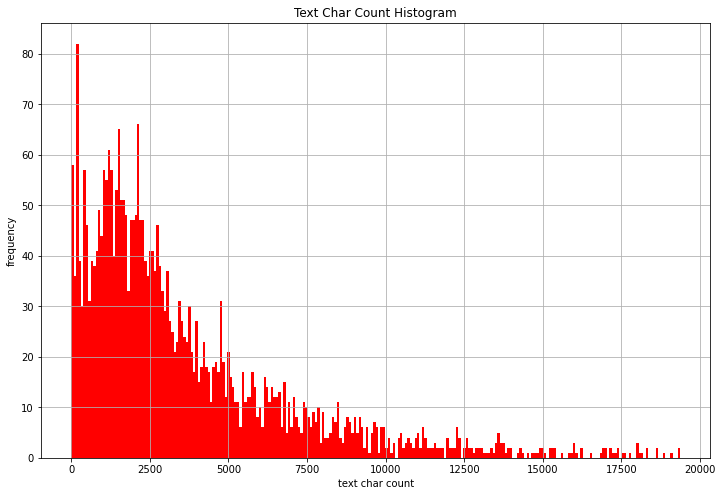

In [121]:
tmp_df = df_fake[df_fake['text_len'] < 20000]

bins = 250
plt.figure(figsize=(12, 8))
plt.hist(tmp_df.text_len, bins=bins, color="red")
# plt.ylim(min_freq_text_len, max_freq_text_len)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

# Word count

# Real Word Counts

In [159]:
# label = REAL 
max_text_cnt = max(df_real.text_cnt)
min_text_cnt = min(df_real.text_cnt)
max_freq_text_cnt = df_real.text_cnt.value_counts().max()
min_freq_text_cnt = df_real.text_cnt.value_counts().min()
cnt_distinct_text_cnt = df_real.text_cnt.nunique()

print("""
    max(text_cnt): {0}
    min(text_cnt): {1} 
    max(freq_text_cnt): {2}
    min(freq_text_cnt): {3}
    count(distinct freq_text_cnt): {4}
""".format(max_text_cnt, min_text_cnt, max_freq_text_cnt, min_freq_text_cnt, cnt_distinct_text_cnt))


    max(text_cnt): 7546
    min(text_cnt): 7 
    max(freq_text_cnt): 73
    min(freq_text_cnt): 1
    count(distinct freq_text_cnt): 1470



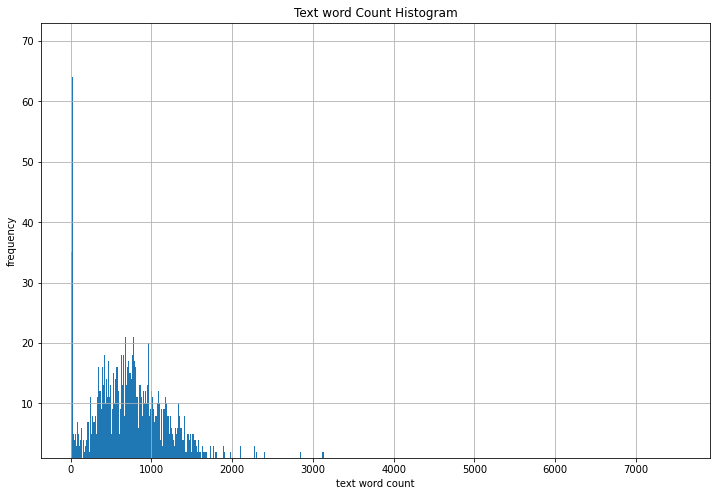

In [160]:
bins = cnt_distinct_text_cnt
plt.figure(figsize=(12, 8))
plt.hist(df_real.text_cnt, bins=bins)
plt.ylim(min_freq_text_cnt, max_freq_text_cnt)
plt.xlabel('text word count')
plt.ylabel('frequency')
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

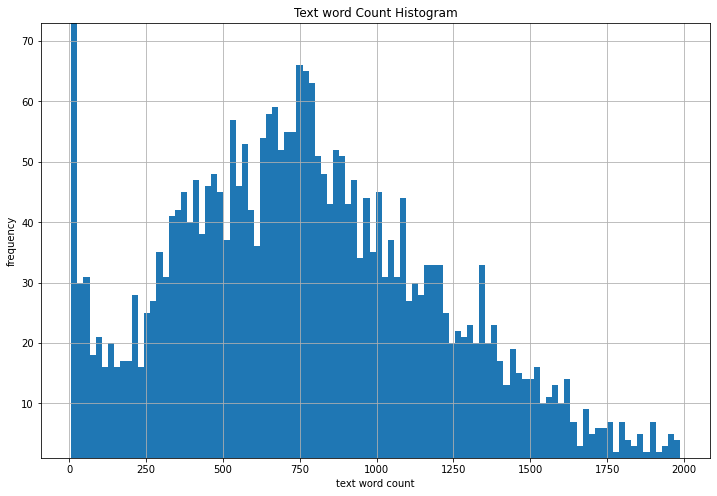

In [167]:
tmp_df = df_real[df_real['text_cnt'] < 2000]

bins = 100
plt.figure(figsize=(12, 8))
plt.hist(tmp_df.text_cnt, bins=bins)
plt.ylim(min_freq_text_cnt, max_freq_text_cnt)
plt.xlabel('text word count')
plt.ylabel('frequency')
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

In [177]:
df_real['text_cnt'].describe()

count    3171.000000
mean      852.018606
std       706.371750
min         7.000000
25%       438.000000
50%       752.000000
75%      1095.000000
max      7546.000000
Name: text_cnt, dtype: float64

In [176]:
df_real[df_real['text_cnt'] < 2000]['text_cnt'].describe()

count    3022.000000
mean      741.787889
std       443.695182
min         7.000000
25%       421.000000
50%       727.500000
75%      1036.750000
max      1987.000000
Name: text_cnt, dtype: float64

# Fake Word Counts

In [168]:
# label = FAKE 
max_text_cnt = max(df_fake.text_cnt)
min_text_cnt = min(df_fake.text_cnt)
max_freq_text_cnt = df_fake.text_cnt.value_counts().max()
min_freq_text_cnt = df_fake.text_cnt.value_counts().min()
cnt_distinct_text_cnt = df_fake.text_cnt.nunique()

print("""
    max(text_cnt): {0}
    min(text_cnt): {1} 
    max(freq_text_cnt): {2}
    min(freq_text_cnt): {3}
    count(distinct freq_text_cnt): {4}
""".format(max_text_cnt, min_text_cnt, max_freq_text_cnt, min_freq_text_cnt, cnt_distinct_text_cnt))


    max(text_cnt): 20897
    min(text_cnt): 2 
    max(freq_text_cnt): 36
    min(freq_text_cnt): 1
    count(distinct freq_text_cnt): 1359



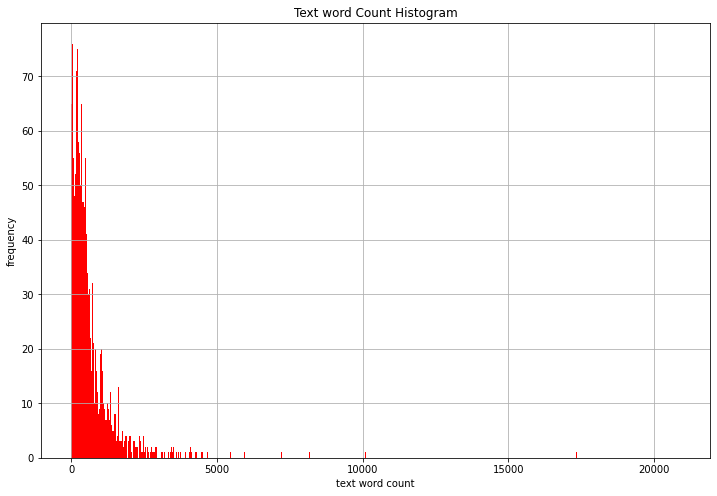

In [170]:
bins = cnt_distinct_text_cnt
plt.figure(figsize=(12, 8))
plt.hist(df_fake.text_cnt, bins=bins, color="red")
plt.ylim(min_freq_text_cnt, max_freq_text_cnt)
plt.xlabel('text word count')
plt.ylabel('frequency')
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

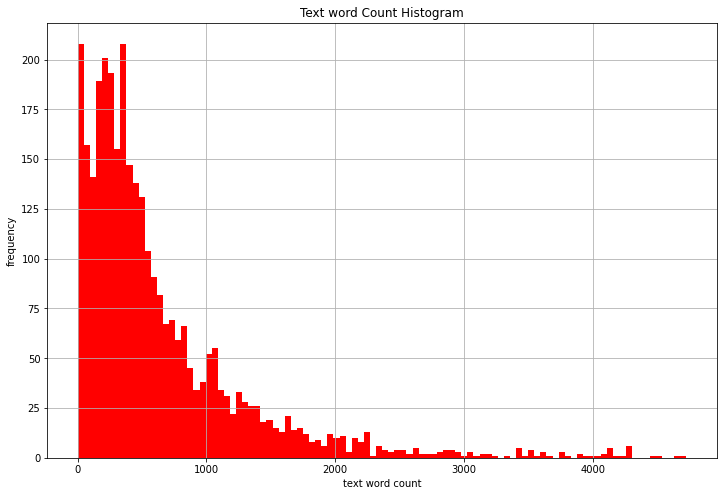

In [174]:
# also show 2000 articles 
tmp_df = df_fake[df_fake['text_cnt'] < 5000]

bins = 100
plt.figure(figsize=(12, 8))
plt.hist(tmp_df.text_cnt, bins=bins, color="red")
# plt.ylim(min_freq_text_cnt, max_freq_text_cnt)
plt.xlabel('text word count')
plt.ylabel('frequency')
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

In [178]:
df_fake['text_cnt'].describe()

count     3164.000000
mean       678.947535
std        957.274981
min          2.000000
25%        212.000000
50%        421.000000
75%        828.250000
max      20897.000000
Name: text_cnt, dtype: float64

In [179]:
df_fake[df_fake['text_cnt'] < 2000]['text_cnt'].describe()

count    2995.000000
mean      524.389983
std       436.097343
min         2.000000
25%       205.000000
50%       394.000000
75%       733.000000
max      1999.000000
Name: text_cnt, dtype: float64

## Discussion: difference between word counts in fake and real articles

# Calculate the min and max character and word counts for title and text columns.

In [94]:
title_char_max  = df.title.str.len().max()
title_char_min  = df.title.str.len().min()
title_word_max  = (df.title.str.count(' ') + 1).max()
title_word_min  = (df.title.str.count(' ') + 1).min()

print("""
    title_char_max: {0}
    title_char_min: {1}
    title_word_max: {2}
    title_word_min: {3}
""".format(title_char_max, title_char_min, title_word_max, title_word_min))


    title_char_max: 289
    title_char_min: 1
    title_word_max: 53
    title_word_min: 1



In [95]:
text_char_max  = df.text.str.len().max()
text_char_min  = df.text.str.len().min()
text_word_max  = (df.text.str.count(' ') + 1).max()
text_word_min  = (df.text.str.count(' ') + 1).min()

print("""
    text_char_max: {0}
    text_char_min: {1}
    text_word_max: {2}
    text_word_min: {3}
""".format(text_char_max, text_char_min, text_word_max, text_word_min))


    text_char_max: 115848
    text_char_min: 1
    text_word_max: 20897
    text_word_min: 2



# Calculate the total number of distinct words across all articles. 
# Note the difference between the max words in the text and the total number of unique words in the dataset.

In [182]:
# Total # of words
df['text_cnt'] = df.text.str.count(' ') + 1

# Total # of unique words (Is there better way remove special characters from text?)
df['cnt_distinct_word'] = df.text.str.replace('[(,“,),%,$,+,.,\,,@,—,‘,’,!]', '').str.lower().str.strip().str.split(' ')
df['cnt_distinct_word'] = [len(set(word)) for word in df.cnt_distinct_word]

# Difference
df['diff'] = df['text_cnt']-df['cnt_distinct_word']
df

,Unnamed: 0,title,text,label,text_len,text_cnt,char_to_word,cnt_distinct_word,diff
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518,1298,5.791988,554,744
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646,446,5.932735,277,169
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543,423,6.011820,237,186
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660,404,6.584158,249,155
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840,307,5.993485,176,131
...,...,...,...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,4076,629,6.480127,276,353
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,14323,2183,6.561154,1028,1155
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,11974,1910,6.269110,768,1142
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,6991,1093,6.396157,544,549


In [183]:
distinct_ratio_df = df
distinct_ratio_df['distinct_ratio'] = distinct_ratio_df['cnt_distinct_word'] / distinct_ratio_df['text_cnt']
distinct_ratio_df

,Unnamed: 0,title,text,label,text_len,text_cnt,char_to_word,cnt_distinct_word,diff,distinct_ratio
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518,1298,5.791988,554,744,0.426810
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646,446,5.932735,277,169,0.621076
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543,423,6.011820,237,186,0.560284
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660,404,6.584158,249,155,0.616337
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840,307,5.993485,176,131,0.573290
...,...,...,...,...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,4076,629,6.480127,276,353,0.438792
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,14323,2183,6.561154,1028,1155,0.470912
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,11974,1910,6.269110,768,1142,0.402094
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,6991,1093,6.396157,544,549,0.497713


What does this ratio mean?

In [184]:
distinct_ratio_df['distinct_ratio'].describe()

count    6335.000000
mean        0.564793
std         0.138189
min         0.190984
25%         0.478149
50%         0.534247
75%         0.617247
max         1.000000
Name: distinct_ratio, dtype: float64

In [185]:
distinct_ratio_df[distinct_ratio_df['label'] == "REAL"]['distinct_ratio'].describe()

count    3171.000000
mean        0.552604
std         0.141911
min         0.251391
25%         0.470097
50%         0.519144
75%         0.579376
max         1.000000
Name: distinct_ratio, dtype: float64

In [186]:
distinct_ratio_df[distinct_ratio_df['label'] == "FAKE"]['distinct_ratio'].describe()

count    3164.000000
mean        0.577009
std         0.133264
min         0.190984
25%         0.488807
50%         0.559197
75%         0.649799
max         1.000000
Name: distinct_ratio, dtype: float64

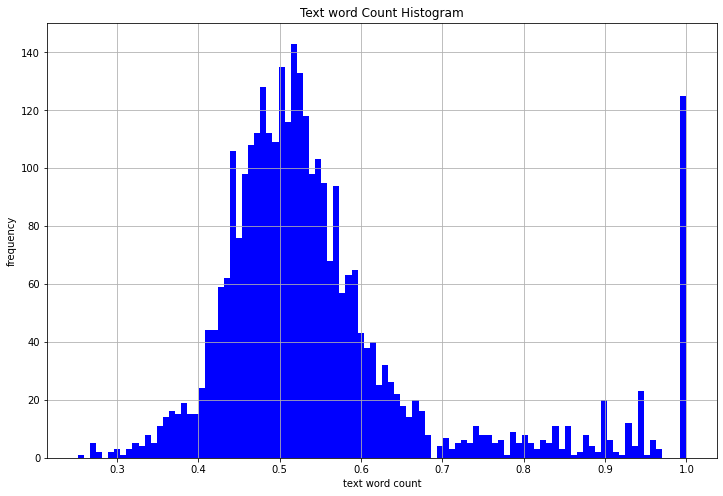

In [188]:
bins = 100
plt.figure(figsize=(12, 8))
plt.hist(distinct_ratio_df[distinct_ratio_df['label'] == "REAL"]['distinct_ratio'], bins=bins, color="blue")
plt.xlabel('text word count')
plt.ylabel('frequency')
# plt.xlim(0, 10)
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

What does a ratio of 1 mean? There are 120 articles like this.

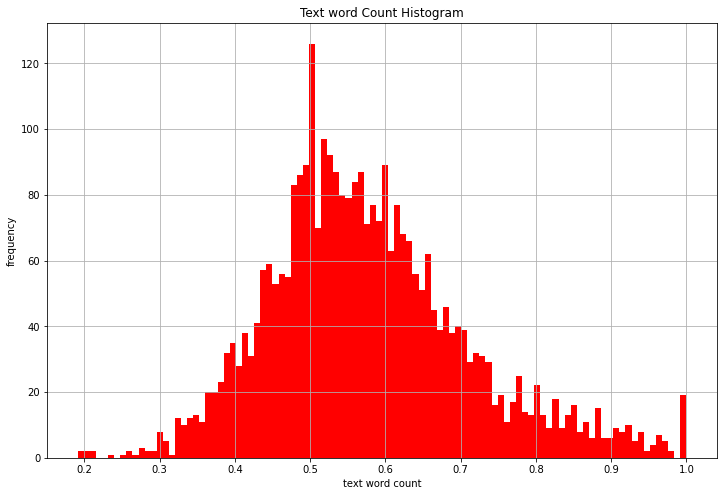

In [190]:
bins = 100
plt.figure(figsize=(12, 8))
plt.hist(distinct_ratio_df[distinct_ratio_df['label'] == "FAKE"]['distinct_ratio'], bins=bins, color="red")
plt.xlabel('text word count')
plt.ylabel('frequency')
# plt.xlim(0, 10)
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

## What about the character to word ratio between fake and real articles?

In [158]:
ratio_df = df
ratio_df['char_to_word'] = ratio_df['text_len'] / ratio_df['text_cnt']
ratio_df

,Unnamed: 0,title,text,label,text_len,text_cnt,char_to_word
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518,1298,5.791988
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646,446,5.932735
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543,423,6.011820
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660,404,6.584158
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840,307,5.993485
...,...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,4076,629,6.480127
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,14323,2183,6.561154
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,11974,1910,6.269110
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,6991,1093,6.396157


In [155]:
ratio_df['char_to_word'].describe()

count    6335.000000
mean        6.132453
std         0.843677
min         0.500000
25%         5.947837
50%         6.153846
75%         6.340880
max        49.496000
Name: char_to_word, dtype: float64

In [153]:
ratio_df[ratio_df['label'] == "REAL"]['char_to_word'].describe()

count    3171.000000
mean        6.228743
std         0.306222
min         4.640000
25%         6.067430
50%         6.229993
75%         6.395342
max         7.527711
Name: char_to_word, dtype: float64

In [154]:
ratio_df[ratio_df['label'] == "FAKE"]['char_to_word'].describe()

count    3164.000000
mean        6.035950
std         1.145771
min         0.500000
25%         5.834852
50%         6.055629
75%         6.264377
max        49.496000
Name: char_to_word, dtype: float64

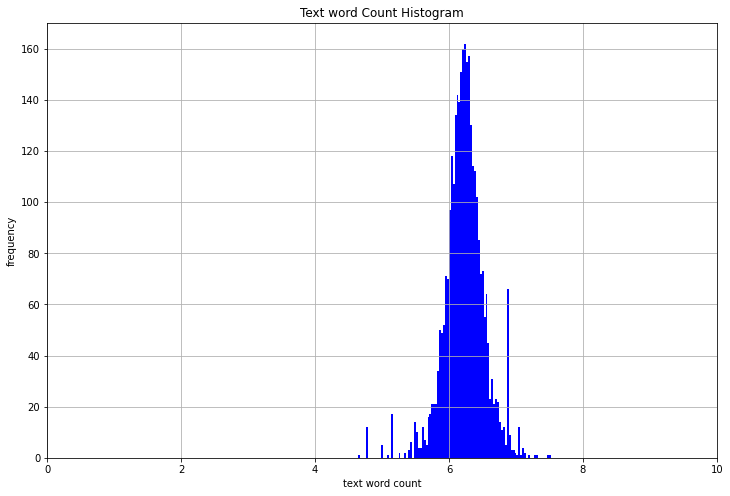

In [145]:
bins = 100
plt.figure(figsize=(12, 8))
plt.hist(ratio_df[ratio_df['label'] == "REAL"]['char_to_word'], bins=bins, color="blue")
plt.xlabel('text word count')
plt.ylabel('frequency')
plt.xlim(0, 10)
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

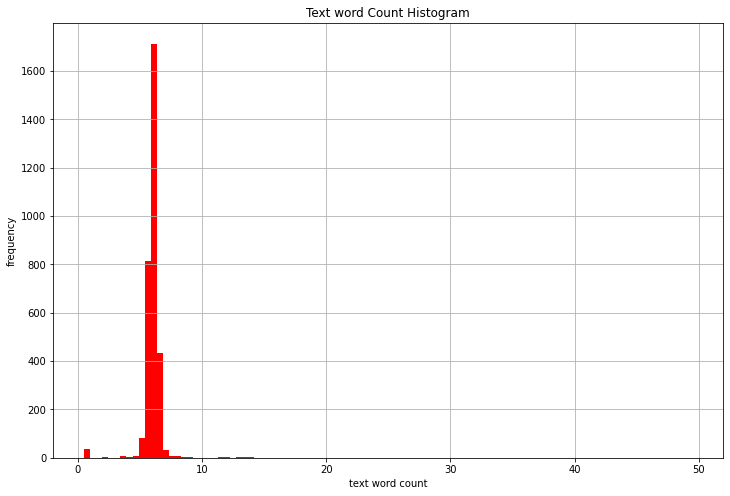

In [147]:
bins = 100
plt.figure(figsize=(12, 8))
plt.hist(ratio_df[ratio_df['label'] == "FAKE"]['char_to_word'], bins=bins, color="red")
plt.xlabel('text word count')
plt.ylabel('frequency')
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

/Users/turbo/projects/fake_news_analysis/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


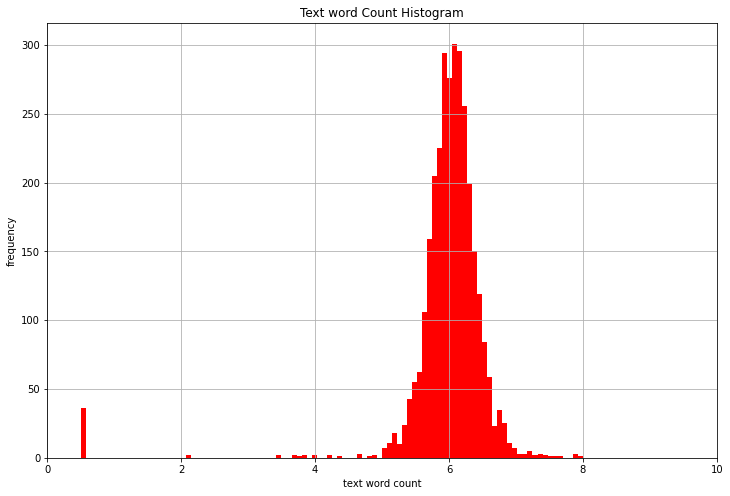

In [148]:
bins = 100
plt.figure(figsize=(12, 8))
plt.hist(ratio_df[ratio_df['label'] == "FAKE"][ratio_df['char_to_word'] <= 8]['char_to_word'], bins=bins, color="red")
plt.xlabel('text word count')
plt.ylabel('frequency')
plt.xlim(0, 10)
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

# Stop Words 

also 1 letter words

NLTK: natural language toolkit: https://www.nltk.org/data.html#command-line-installation

In [199]:
# to install the natural language toolkip
# $ pip install nltk

# to install the "stopwords" resource
# $ python -m nltk.downloader stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each